In [2]:
import collections
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
win_lines = [
    # Rows
    [(0, 0), (0, 1), (0, 2)],  # Row 1
    [(1, 0), (1, 1), (1, 2)],  # Row 2
    [(2, 0), (2, 1), (2, 2)],  # Row 3
    # Columns
    [(0, 0), (1, 0), (2, 0)],  # Column 1
    [(0, 1), (1, 1), (2, 1)],  # Column 2
    [(0, 2), (1, 2), (2, 2)],  # Column 3
    # Diagonals
    [(0, 0), (1, 1), (2, 2)],  # Main diagonal
    [(0, 2), (1, 1), (2, 0)]   # Anti-diagonal
]

class Game():

    def __init__(self):
        self.symbols = {1:'X', -1:'0', 0:' '}
        self.action_space = self.get_action_space()
        self.state_space = range(19683)
        self.board = np.zeros((3, 3))  
        self.x = 1  # player 1
        self.o = -1  # player 2
        self.winner = None  
        self.gameOver = False 
        self.max_states = 3 ** (3 * 3)  # =19683, total number of possible states for tic tac toe game
        
    
    def get_random_action(self):
#         count = 0.0
        while True:  
#             count += 1
#             if count % 88 == 0:
#                 count = 0
#                 print('get_random_action')
            idx = random.randint(0, 8)
            if self.is_empty(idx):
                return idx
        
        
    def reset(self):
        self.board = np.zeros((3, 3))
        self.winner = None  
        self.gameOver = False 
        return self.get_state()

        
    def is_empty(self, idx):
        i, j = self.action_space[idx]
        return self.board[i, j] == 0
    
    
    def get_action_space(self):
        action_dict = {}
        idx = 0
        for i in range(3):
            for j in range(3):
                action_dict[idx] = (i, j)
                idx += 1
        return action_dict
    
    
    def step(self, action, symbol, show_board=False):
        reward = 0.0
        
#         # if 2 cells in line belongs to player
#         is_win_cell = self.check_2_sybmols_in_line(symbol, action)
#         if is_win_cell:
#             reward += 1
  
#         # if 2 cells in line belongs to enemy
#         is_win_cell = self.check_2_sybmols_in_line(-symbol, action)
#         if is_win_cell:
#             reward += 1
        
        self.move(action, symbol)
    
        state = self.get_state()
        
        is_done = self.is_game_over()
        
        if is_done:
            if self.winner == symbol:
                reward += 1
                
#         if is_done:
#             if self.winner == -symbol:
#                 reward -= 1
        
        if show_board:
            self.print_board()
        
        return state, reward, is_done, self.winner
    
    
    def move(self, action, symbol):
        i, j = self.action_space[action]
        self.board[i, j] = symbol
    
    
    def check_2_sybmols_in_line(self, symbol, action):
        ar = self.board
        for line in win_lines:
            line_coords = [line[0], line[1], line[2]]
            line_values = [ar[line[0]], ar[line[1]], ar[line[2]]]
            sum_line = sum(line_values)
            if sum_line == 2 * symbol:
                idx_of_coord_in_line = self.get_idx_of_zero_value_in_line(line_values)
                target_coord = line_coords[idx_of_coord_in_line]
                idx = self.find_action_by_coord(target_coord)
#                 print('potential_line', line_coords)
#                 print('action', action, 'idx', idx)
                if action == idx:
                    return True
        return False
        
        
    def get_idx_of_zero_value_in_line(self, ar):
        for i in range(len(ar)):
            if ar[i] == 0:
                return i
            
    
    def find_action_by_coord(self, target_value):
        for idx, value in self.action_space.items():
            if value == target_value:
                return idx

    
    def is_draw(self):
        if self.gameOver and self.winner is None: 
            return True
        return False
    
    
#     def get_state(self):
#         # returns state as an integer
#         state = 0
#         loop_index = 0
#         for i in range(3):
#             for j in range(3):
#                 if self.board[i, j] == self.x:
#                     state_value = 1
#                 elif self.board[i, j] == self.o:
#                     state_value = 2
#                 else:
#                     state_value = 0  # empty

#                 state += (3 ** loop_index) * state_value
#                 loop_index += 1
#         return state

    def get_state(self):
        state_str = ''
        for idx in range(len(self.action_space)):
            i, j = self.action_space[idx]
            if self.board[i][j] == self.x:
                state_str += 'x'
            elif self.board[i][j] == self.o:
                state_str += 'o'
            else:
                state_str += 'e'
        return state_str

    
    def is_game_over(self):
        if self.gameOver:  
            return True

        players = [self.x, self.o]
 
        for player in players:
            for line in win_lines:
                sum_line = self.board[line[0][0]][line[0][1]] + self.board[line[1][0]][line[1][1]] + self.board[line[2][0]][line[2][1]]
                if sum_line == 3 * player:
                    self.winner = player
                    self.gameOver = True
                    return True  

        # no winner
        board_with_true_false = self.board == 0
        if np.all(board_with_true_false == False):
            self.winner = None
            self.gameOver = True
            return True 

        # if game is not over
        self.winner = None
        return False

    
    def print_board(self):
        print('-' * 40)
        for row in self.board:
            print(' | '.join(self.symbols[el] for el in row))
            print('-' * 9)

In [4]:
GAMMA = 0.9
TEST_EPISODES = 400

In [5]:
# если считать оценку после хода противника, то можно вычислить вероятность перехода к др состоянию

action_space_n = 9

class Train_Agent:
    def __init__(self, symbol):
        self.symbol = symbol
        # 3 tables
        self.rewards = collections.defaultdict(float)
        self.values = collections.defaultdict(float)
        self.transits = collections.defaultdict(collections.Counter)
    
    
    # evaluate all actions and select action with best value
    def select_action(self, env, state):
        best_action, best_value = None, None
        for action in range(action_space_n):
            value = self.values[(state, action)]
            if env.is_empty(action) and (best_value is None or best_value < value):
                best_value = value
                best_action = action
        return best_action
    
    
    # calculate values of state and assign best value. do it for each state
    def value_iteration(self, env):
        state_val_list = list(self.values)
        for i in range(len(state_val_list)):
            state = state_val_list[i][0]
            for action in range(action_space_n):
                action_value = 0.0
                target_counts = self.transits[(state, action)]
                total = sum(target_counts.values())
                for tgt_state, count in target_counts.items():
                    reward = self.rewards[(state, action, tgt_state)]
                    best_action = self.select_action(env, tgt_state)
                    action_value += (count / total) * (reward + GAMMA * self.values[(tgt_state, best_action)])
                self.values[(state, action)] = action_value

In [6]:
class Random_Agent:
    def __init__(self, symbol):
        self.symbol = symbol
        
    def select_action(self, env, state):
        return env.get_random_action()

In [7]:
# random experience
def play_n_random_steps(count, env, agent_x):
    current_player = env.o
    state = None
    for _ in range(count): 
        
        # random action
        action_ = env.get_random_action()
        # step
        new_state, _, is_done, _ = env.step(action_, current_player)
        
        if state is not None:
            # remember
            agent_x.rewards[(state, action, new_state)] = reward
            agent_x.transits[(state, action)][new_state] += 1
        
        state = env.reset() if is_done else new_state
        
        # change player
        if current_player == env.x:
            current_player = env.o
        else:
            current_player = env.x
            
        # random action
        action = env.get_random_action()
        # step
        new_state, reward, is_done, _ = env.step(action, current_player)
        
        if is_done:
            # remember
            agent_x.rewards[(state, action, new_state)] = reward
            agent_x.transits[(state, action)][new_state] += 1
            
            env.reset()
            
            state = None
            
        # change player
        if current_player == env.x:
            current_player = env.o
        else:
            current_player = env.x
              
        
def play_episode(env, agent_x, agent_o):
    total_reward = 0.0
    current_player = agent_o
    state = None
    new_state = env.reset()
    while True:
        action_ = current_player.select_action(env, new_state)
        
        new_state, _, is_done, winner = env.step(action_, current_player.symbol)
        
        if state is not None:
            # remember
            agent_x.rewards[(state, action, new_state)] = reward
            agent_x.transits[(state, action)][new_state] += 1
        
        if is_done:
            break
            
        state = new_state
        
        # change player
        if current_player == agent_x:
            current_player = agent_o
        else:
            current_player = agent_x
            
        action = current_player.select_action(env, state)
        # step
        new_state, reward, is_done, winner = env.step(action, current_player.symbol)
        
        if is_done:
            # remember
            agent_x.rewards[(state, action, new_state)] = reward
            agent_x.transits[(state, action)][new_state] += 1
            break
            
        # change player
        if current_player == agent_x:
            current_player = agent_o
        else:
            current_player = agent_x
            
    env.reset()
    return total_reward, winner

In [8]:
test_env = Game()
agent_x = Train_Agent(test_env.x)
agent_o = Random_Agent(test_env.o)

In [9]:
iter_no = 0

best_x_mean_wins = 0.0
x_wins = []
o_wins = []

while True:
    iter_no += 1
    
    play_n_random_steps(1000, test_env, agent_x)
    
    # train
    agent_x.value_iteration(test_env)
    
    mean_x_wins = 0.0
    mean_o_wins = 0.0
    for _ in range(TEST_EPISODES):
        reward, winner = play_episode(test_env, agent_x, agent_o)
        if winner == test_env.x:
            mean_x_wins += 1
        else:
            mean_o_wins += 1
    x_wins.append(mean_x_wins)
    o_wins.append(mean_o_wins)
    
        
    if mean_x_wins > best_x_mean_wins:
        print('Iteration: %d  | Best win updated %.3f -> %.3f' % (iter_no, best_x_mean_wins, mean_x_wins))
        best_x_mean_wins = mean_x_wins
    if mean_x_wins > 390:
        print('Solved in %d iterations' % iter_no)
        break

Iteration: 1  | Best win updated 0.000 -> 173.000
Iteration: 2  | Best win updated 173.000 -> 175.000
Iteration: 3  | Best win updated 175.000 -> 190.000
Iteration: 5  | Best win updated 190.000 -> 195.000
Iteration: 6  | Best win updated 195.000 -> 213.000
Iteration: 9  | Best win updated 213.000 -> 259.000
Iteration: 18  | Best win updated 259.000 -> 292.000
Iteration: 29  | Best win updated 292.000 -> 301.000
Iteration: 38  | Best win updated 301.000 -> 309.000
Iteration: 39  | Best win updated 309.000 -> 319.000
Iteration: 43  | Best win updated 319.000 -> 324.000
Iteration: 44  | Best win updated 324.000 -> 342.000
Iteration: 56  | Best win updated 342.000 -> 345.000
Iteration: 62  | Best win updated 345.000 -> 351.000
Iteration: 70  | Best win updated 351.000 -> 357.000
Iteration: 71  | Best win updated 357.000 -> 360.000
Iteration: 106  | Best win updated 360.000 -> 362.000
Iteration: 107  | Best win updated 362.000 -> 371.000
Iteration: 188  | Best win updated 371.000 -> 377.00

KeyboardInterrupt: 

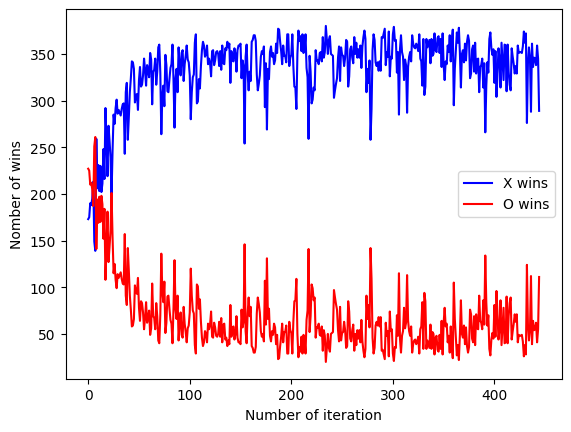

In [10]:
plt.plot(x_wins, label='X wins', color='blue')
plt.plot(o_wins, label='O wins', color='red')

plt.xlabel('Number of iteration')
plt.ylabel('Nomber of wins')
plt.legend()

plt.show()

# Trained vs Trained

In [11]:
# random experience

def play_n_random_steps(count, env, player_1, player_2, show_board):
    state_1 = env.reset()
    state_2 = None
    
    for _ in range(count): 
        # random action player 1
        action_1 = env.get_random_action()
        # step player 1
        new_state_1, reward_1, is_done, _ = env.step(action_1, player_1.symbol, show_board)
        
        if is_done:
            # remember player 1
            player_1.rewards[(state_1, action_1, new_state_1)] = reward_1
            player_1.transits[(state_1, action_1)][new_state_1] += 1
            
        if state_2 is not None:
            # remember player_2
            player_2.rewards[(state_2, action_2, new_state_1)] = -reward_1 if is_done else reward_2
            player_2.transits[(state_2, action_2)][new_state_1] += 1
        
        state_2 = env.reset() if is_done else new_state_1
            
        # random action player 2
        action_2 = env.get_random_action()
        # step player 2
        new_state_2, reward_2, is_done, _ = env.step(action_2, player_2.symbol, show_board)
        
        if is_done:
            # remember player 2
            player_2.rewards[(state_2, action_2, new_state_2)] = reward_2
            player_2.transits[(state_2, action_2)][new_state_2] += 1

        # remember player 1
        player_1.rewards[(state_1, action_1, new_state_2)] = -reward_2 if is_done else reward_1
        player_1.transits[(state_1, action_1)][new_state_2] += 1
        
        state_1 = env.reset() if is_done else new_state_2
            
              
        
def play_trained_episode(env, player_1, player_2, show_board):
    state_1 = env.reset()
    state_2 = None
    
    total_reward = 0.0
    
    while True:
        # action player 1
        action_1 = player_1.select_action(env, state_1)
        # step player 1
        new_state_1, reward_1, is_done, winner = env.step(action_1, player_1.symbol, show_board)
        
        if is_done:
            # remember player 1
            player_1.rewards[(state_1, action_1, new_state_1)] = reward_1
            player_1.transits[(state_1, action_1)][new_state_1] += 1
            break
            
        if state_2 is not None:
            # remember player_2
            player_2.rewards[(state_2, action_2, new_state_1)] = -reward_1 if is_done else reward_2
            player_2.transits[(state_2, action_2)][new_state_1] += 1
        
        state_2 = env.reset() if is_done else new_state_1
            
        # random action player 2
        action_2 = player_1.select_action(env, state_2)
        # step player 2
        new_state_2, reward_2, is_done, winner = env.step(action_2, player_2.symbol, show_board)
        
        if is_done:
            # remember player 2
            player_2.rewards[(state_2, action_2, new_state_2)] = reward_2
            player_2.transits[(state_2, action_2)][new_state_2] += 1
            break

        # remember player 1
        player_1.rewards[(state_1, action_1, new_state_2)] = -reward_2 if is_done else reward_1
        player_1.transits[(state_1, action_1)][new_state_2] += 1
        
        state_1 = env.reset() if is_done else new_state_2
            
    env.reset()
    return total_reward, winner

In [15]:
test_env = Game()
agent_x = Train_Agent(test_env.x)
agent_o = Train_Agent(test_env.o)

TEST_EPISODES = 400

In [16]:
iter_no = 0

best_mean_draws = 0.0
x_wins = []
o_wins = []
draws = []

while True:
    iter_no += 1
    
    play_n_random_steps(1000, test_env, agent_x, agent_o, False)
    
    # train
    agent_x.value_iteration(test_env)
    agent_o.value_iteration(test_env)
    

    mean_x_wins = 0.0
    mean_o_wins = 0.0
    mean_draws = 0.0
    for i in range(TEST_EPISODES):
        reward, winner = play_trained_episode(test_env, agent_x, agent_o, False)
        if winner == test_env.x:
            mean_x_wins += 1
        elif winner == test_env.o:
            mean_o_wins += 1
        else:
            mean_draws += 1
            
    x_wins.append(mean_x_wins)
    o_wins.append(mean_o_wins)
    draws.append(mean_draws)
        
    if mean_draws > best_mean_draws:
        print('Iteration: %d  | Best draws updated %.3f -> %.3f' % (iter_no, best_mean_draws, mean_draws))
        best_mean_draws = mean_draws
#     if mean_draws > 390:
#         print('Solved in %d iterations' % iter_no)
#         break

Iteration: 6  | Best draws updated 0.000 -> 400.000


KeyboardInterrupt: 

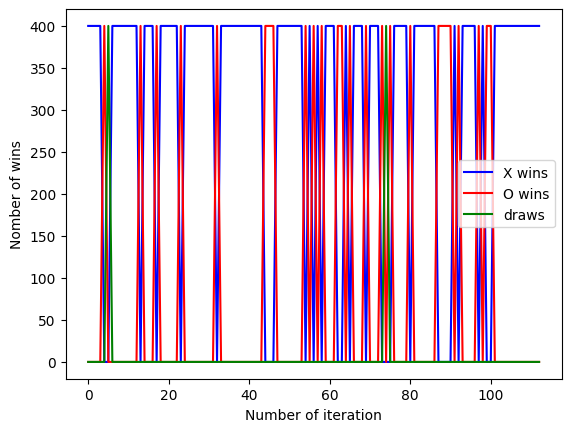

In [17]:
plt.plot(x_wins, label='X wins', color='blue')
plt.plot(o_wins, label='O wins', color='red')
plt.plot(draws, label='draws', color='green')

plt.xlabel('Number of iteration')
plt.ylabel('Nomber of wins')
plt.legend()

plt.show()